In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

historical = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")


In [13]:
historical['Timestamp'].head(5)


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64

In [14]:
historical['Timestamp'] = pd.to_datetime(
    historical['Timestamp'],
    unit='ms',
    errors='coerce'
)


In [15]:
historical['Timestamp'].head()


0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27 03:33:20
Name: Timestamp, dtype: datetime64[ns]

In [16]:
historical['date'] = historical['Timestamp'].dt.normalize()


In [17]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce').dt.normalize()
fear_greed['classification'] = fear_greed['classification'].astype(str)


In [18]:
df = historical.merge(
    fear_greed[['date', 'classification']],
    on='date',
    how='left'
)


In [19]:
df['classification'].value_counts(dropna=False).head(10)


classification
Fear             133871
Greed             36289
NaN               26961
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

In [20]:
df_plot = df.dropna(subset=['classification']).copy()


In [21]:
df_plot['classification'].value_counts()


classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

In [22]:
def map_sentiment(x):
    if 'Fear' in x:
        return 'Fear'
    elif 'Greed' in x:
        return 'Greed'
    else:
        return np.nan

df_plot['sentiment'] = df_plot['classification'].apply(map_sentiment)
df_plot = df_plot.dropna(subset=['sentiment'])


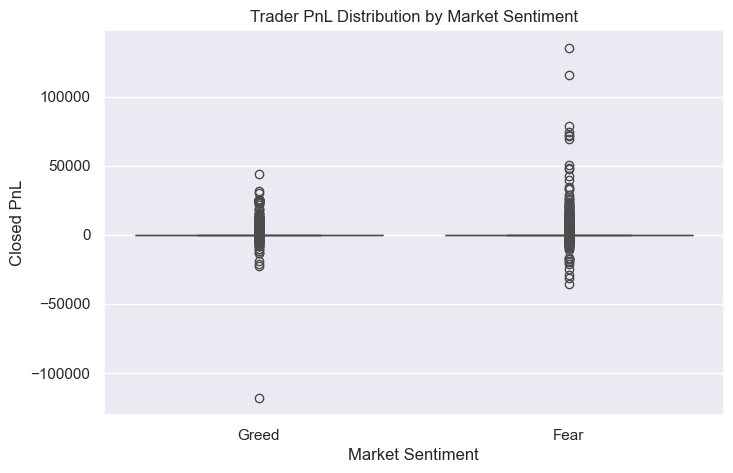

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_plot,
    x='sentiment',
    y='Closed PnL'
)

plt.title("Trader PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


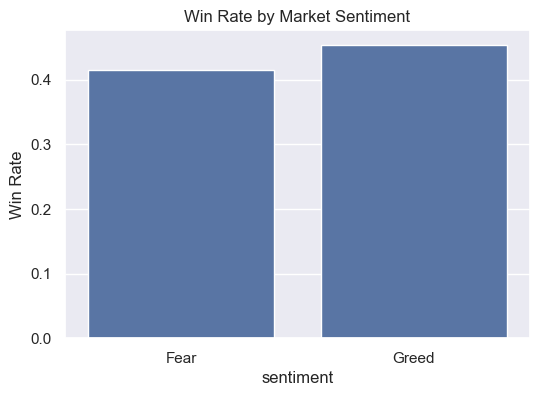

In [25]:
df_plot['win'] = df_plot['Closed PnL'] > 0

win_rate = (
    df_plot.groupby('sentiment')['win']
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=win_rate,
    x='sentiment',
    y='win'
)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()


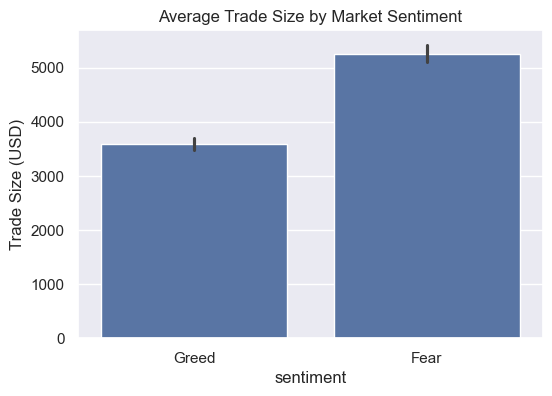

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df_plot,
    x='sentiment',
    y='Size USD'
)
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.show()


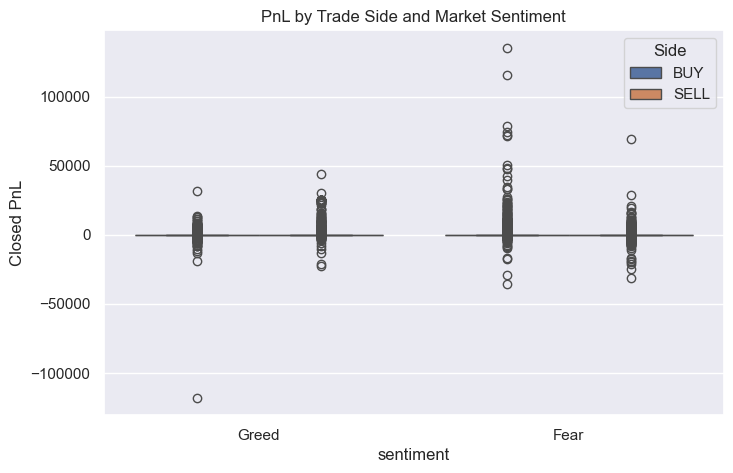

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_plot,
    x='sentiment',
    y='Closed PnL',
    hue='Side'
)
plt.title("PnL by Trade Side and Market Sentiment")
plt.show()


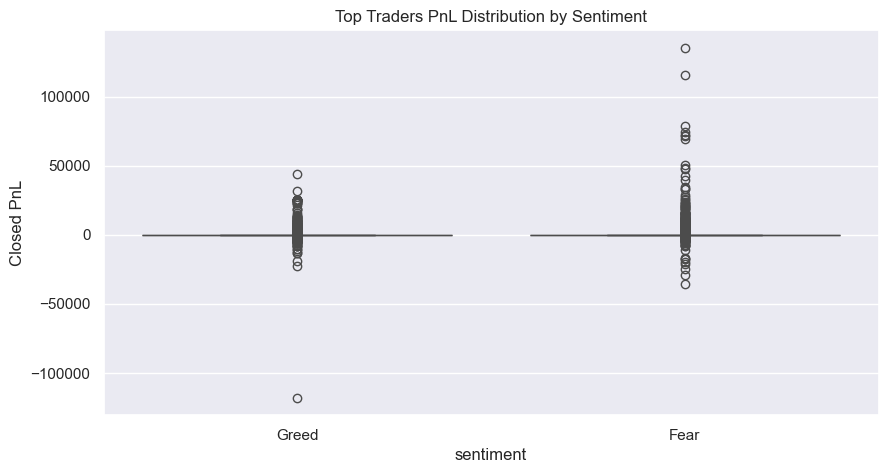

In [28]:
top_accounts = (
    df_plot.groupby('Account')['Closed PnL']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_df = df_plot[df_plot['Account'].isin(top_accounts)]

plt.figure(figsize=(10,5))
sns.boxplot(
    data=top_df,
    x='sentiment',
    y='Closed PnL'
)
plt.title("Top Traders PnL Distribution by Sentiment")
plt.show()


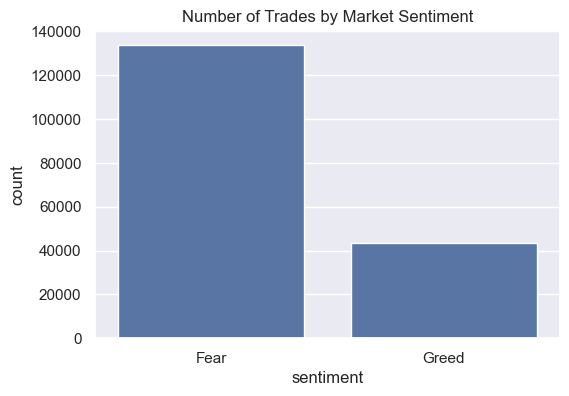

In [29]:
trade_count = df_plot['sentiment'].value_counts().reset_index()
trade_count.columns = ['sentiment', 'count']

plt.figure(figsize=(6,4))
sns.barplot(
    data=trade_count,
    x='sentiment',
    y='count'
)
plt.title("Number of Trades by Market Sentiment")
plt.show()
